In [11]:
# import some libraries.  I don't think we'll need all these, but it doesn't hurt to have them ready. 
%matplotlib inline
# import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os
import numpy as np
from IPython.display import Image
import sys
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# load the data
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [13]:
for i in digits:
    print(i)

data
target
frame
feature_names
target_names
images
DESCR


In [14]:
# look at the keys
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [15]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)
print(digits.target.shape)

(1797, 8, 8)
(1797, 64)
(1797,)


In [16]:
import pandas as pd
df = pd.DataFrame({"target":digits.target})
df

,target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


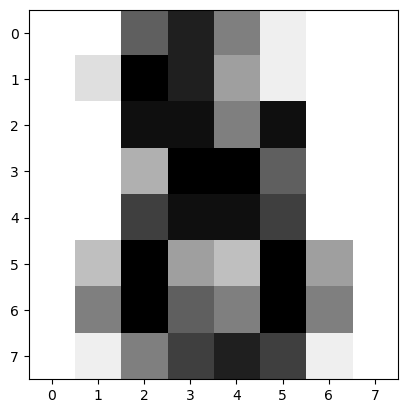

In [17]:
# Display digit 1010
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r, interpolation='nearest')

In [18]:
# Create feature and target arrays
X = digits.data
y = digits.target
print(X)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [19]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [20]:
# Loop over different values of k
train_accuracy = []
test_accuracy = []

for i in range(0,10):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=i+1)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy.append(knn.score(X_train, y_train))

    #Compute accuracy on the testing set
    test_accuracy.append(knn.score(X_test, y_test))
    

print(train_accuracy)
print(test_accuracy)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

[1.0, 0.9923451635351427, 0.9965205288796103, 0.9916492693110647, 0.9909533750869868, 0.988169798190675, 0.988169798190675, 0.9860821155184412, 0.9853862212943633, 0.9853862212943633]
[0.9805555555555555, 0.9805555555555555, 0.9833333333333333, 0.9805555555555555, 0.9805555555555555, 0.9805555555555555, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9861111111111112]


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [21]:
for i in range(len(train_accuracy)):
    print(i,train_accuracy[i]-test_accuracy[i])

0 0.019444444444444486
1 0.011789607979587169
2 0.013187195546277009
3 0.01109371375550916
4 0.010397819531431263
5 0.00761424263511945
6 0.004836464857341682
7 0.0027487821851078786
8 0.002052887961029981
9 -0.0007248898167478979


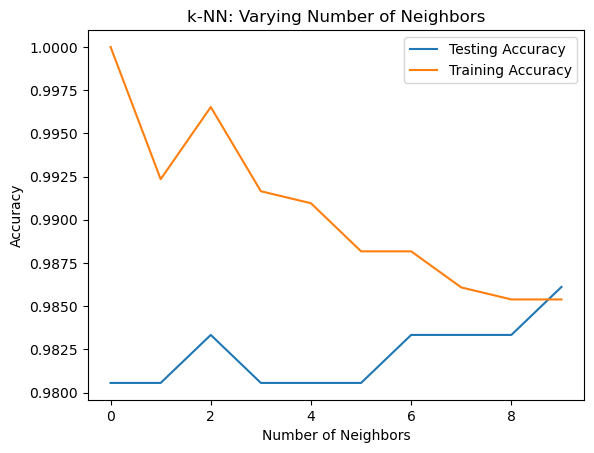

In [22]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
neighbors = [i for i in range(0,10)]
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
len(knn.predict(X_train))
print(classification_report(y_test, knn.predict(X_test)))

print(confusion_matrix(y_test, knn.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        35
           3       0.97      0.97      0.97        37
           4       1.00      1.00      1.00        36
           5       0.92      1.00      0.96        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      0.97      0.99        35
           9       1.00      0.92      0.96        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  1  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [24]:
knn.predict(X_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([3, 7, 7, 6, 7, 0, 2, 2, 3, 6, 1, 5, 9, 3, 6, 6, 4, 3, 9, 5, 4, 3,
       3, 7, 5, 7, 2, 5, 3, 4, 2, 7, 9, 5, 3, 9, 2, 1, 8, 3, 8, 1, 9, 9,
       3, 3, 4, 8, 1, 8, 6, 1, 1, 2, 0, 5, 7, 4, 6, 4, 2, 3, 2, 6, 4, 9,
       5, 8, 5, 5, 7, 4, 4, 0, 3, 6, 5, 4, 4, 9, 6, 7, 6, 8, 3, 2, 4, 7,
       8, 7, 0, 7, 1, 8, 5, 2, 4, 3, 6, 7, 9, 9, 9, 0, 2, 6, 3, 8, 6, 2,
       3, 1, 5, 5, 6, 6, 9, 5, 8, 3, 6, 2, 8, 1, 0, 7, 6, 2, 7, 9, 2, 1,
       9, 8, 6, 6, 9, 1, 2, 6, 6, 1, 8, 5, 7, 4, 0, 9, 2, 4, 5, 6, 9, 4,
       8, 5, 3, 4, 5, 7, 7, 0, 8, 4, 7, 7, 3, 0, 7, 9, 9, 2, 8, 9, 4, 6,
       3, 7, 7, 7, 4, 5, 2, 8, 0, 7, 3, 5, 1, 6, 2, 1, 4, 9, 5, 1, 4, 4,
       9, 0, 1, 0, 7, 9, 5, 4, 4, 1, 3, 1, 3, 6, 4, 5, 1, 1, 0, 4, 4, 0,
       2, 1, 1, 0, 0, 4, 0, 5, 5, 9, 8, 8, 2, 7, 6, 7, 7, 0, 8, 9, 8, 4,
       9, 2, 0, 0, 0, 1, 5, 8, 3, 1, 3, 1, 8, 1, 5, 9, 8, 8, 6, 6, 9, 5,
       6, 6, 4, 0, 5, 8, 0, 5, 9, 0, 6, 2, 8, 2, 0, 8, 3, 1, 6, 2, 4, 1,
       0, 4, 4, 0, 7, 1, 1, 2, 1, 0, 8, 3, 7, 3, 6,

In [25]:
y_test


array([3, 7, 7, 6, 7, 0, 2, 2, 3, 6, 1, 5, 9, 3, 6, 6, 4, 3, 9, 5, 4, 3,
       3, 7, 5, 7, 2, 5, 3, 4, 2, 7, 9, 5, 3, 9, 2, 1, 8, 3, 8, 1, 9, 9,
       3, 3, 4, 8, 1, 8, 6, 1, 1, 2, 0, 5, 7, 4, 6, 4, 2, 3, 2, 6, 4, 9,
       5, 8, 5, 5, 7, 4, 4, 0, 3, 6, 5, 4, 4, 9, 6, 7, 6, 8, 3, 2, 4, 7,
       8, 7, 0, 7, 1, 8, 5, 2, 4, 3, 6, 7, 9, 9, 9, 0, 2, 6, 3, 8, 6, 2,
       3, 1, 9, 9, 6, 6, 9, 5, 8, 3, 6, 2, 8, 1, 0, 7, 6, 2, 7, 9, 2, 1,
       9, 8, 6, 6, 9, 1, 2, 6, 6, 1, 8, 5, 7, 4, 0, 9, 2, 4, 5, 6, 9, 4,
       8, 5, 3, 4, 5, 7, 7, 0, 8, 4, 7, 7, 3, 0, 7, 9, 9, 2, 8, 9, 4, 6,
       3, 7, 7, 7, 4, 5, 2, 8, 0, 7, 3, 5, 1, 6, 2, 1, 4, 9, 3, 8, 4, 4,
       9, 0, 1, 0, 7, 9, 5, 4, 4, 1, 3, 1, 3, 6, 4, 5, 1, 1, 0, 4, 4, 0,
       2, 1, 1, 0, 0, 4, 0, 5, 5, 9, 8, 8, 2, 7, 6, 7, 7, 0, 8, 9, 8, 4,
       9, 2, 0, 0, 0, 1, 5, 8, 3, 1, 3, 1, 8, 1, 5, 9, 8, 8, 6, 6, 9, 5,
       6, 6, 4, 0, 5, 8, 0, 5, 9, 0, 6, 2, 8, 2, 0, 8, 3, 1, 6, 2, 4, 1,
       0, 4, 4, 0, 7, 1, 1, 2, 1, 0, 8, 3, 7, 3, 6,